# Testing Various models of Classification

In [1]:
!pip install catboost

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv(r"C:\Users\Divyansh\Desktop\my projects\breast cancer\Data.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [4]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
X

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]], dtype=int64)

In [6]:
# Replace 2 with 0 and 4 with 1
y = np.where(y == 2, 0, y)
y = np.where(y == 4, 1, y)

## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Decision Tree Classification model on the Training set

In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [10]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
cross_accuracy=accuracy.mean()*100
cross_Standerd_Deviation=accuracy.std()
print("Accuracy : {:.2f}%".format(accuracy.mean()*100))
print("Standerd Deviation:{}".format(accuracy.std()))

Accuracy : 94.51%
Standerd Deviation:0.0272004904417314


## Making the Confusion Matrix

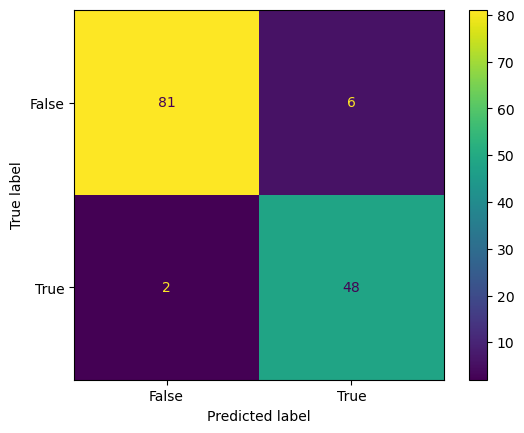

In [11]:
#confusion matrix
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
confusion_matrix =confusion_matrix(y_test, y_pred)
cm_display =ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
#print(confusion_matrix)
decision_accuracy=accuracy_score(y_test, y_pred)


In [12]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion': ['gini','entropy',"log_loss"],"splitter":["best", "random"]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 94.51 %
Best Parameters: {'criterion': 'gini', 'splitter': 'best'}


C:\Users\Divyansh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Divyansh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Divyansh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Divyansh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fi

# XGBoost

In [13]:
from sklearn.model_selection import train_test_split
XG_X_train, XG_X_test, XG_y_train, XG_y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
# Training XGBoost on the Training set
from xgboost import XGBClassifier
XGclassifier = XGBClassifier()
XGclassifier.fit(XG_X_train,XG_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [15]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(estimator=XGclassifier,X=XG_X_train,y=XG_y_train,cv=10)
XG__cross_accuracy=accuracy.mean()*100
XG_cross_Standerd_Deviation=accuracy.std()
print("Accuracy : {:.2f}%".format(accuracy.mean()*100))
print("Standerd Deviation:{}".format(accuracy.std()))

Accuracy : 96.89%
Standerd Deviation:0.021699912229119985


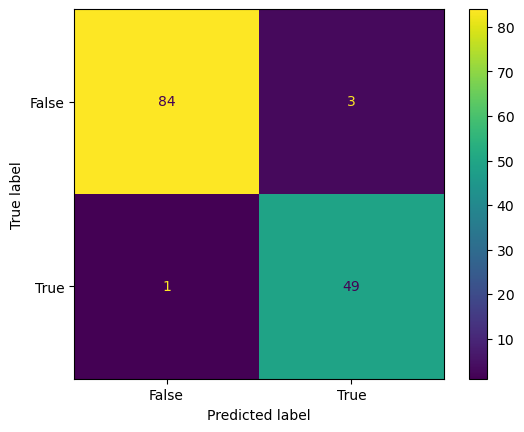

Accuracy: 0.9416058394160584


In [16]:
#confusion matrix
XG_y_pred=XGclassifier.predict(XG_X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
confusion_matrix =confusion_matrix(XG_y_test, XG_y_pred)
cm_display =ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
#print(confusion_matrix)
XG_accuracy=accuracy_score(y_test, y_pred)
print("Accuracy:",XG_accuracy)

# CatBoost

In [17]:
from catboost import CatBoostClassifier
cat_classifier = CatBoostClassifier()
cat_classifier.fit(XG_X_train, XG_y_train)

Learning rate set to 0.007956
0:	learn: 0.6773044	total: 141ms	remaining: 2m 21s
1:	learn: 0.6597970	total: 143ms	remaining: 1m 11s
2:	learn: 0.6444872	total: 143ms	remaining: 47.7s
3:	learn: 0.6292693	total: 144ms	remaining: 36s
4:	learn: 0.6167804	total: 145ms	remaining: 28.9s
5:	learn: 0.6006776	total: 146ms	remaining: 24.2s
6:	learn: 0.5863011	total: 147ms	remaining: 20.8s
7:	learn: 0.5719487	total: 148ms	remaining: 18.3s
8:	learn: 0.5584160	total: 148ms	remaining: 16.3s
9:	learn: 0.5444026	total: 149ms	remaining: 14.8s
10:	learn: 0.5324566	total: 150ms	remaining: 13.5s
11:	learn: 0.5230008	total: 151ms	remaining: 12.4s
12:	learn: 0.5107659	total: 152ms	remaining: 11.5s
13:	learn: 0.4993509	total: 152ms	remaining: 10.7s
14:	learn: 0.4890183	total: 153ms	remaining: 10.1s
15:	learn: 0.4798578	total: 154ms	remaining: 9.47s
16:	learn: 0.4688945	total: 155ms	remaining: 8.95s
17:	learn: 0.4603259	total: 156ms	remaining: 8.49s
18:	learn: 0.4500329	total: 156ms	remaining: 8.08s
19:	learn: 

In [18]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(estimator=cat_classifier,X=XG_X_train,y=XG_y_train,cv=10)
cat_cross_accuracy=accuracy.mean()*100
cat_cross_Standerd_Deviation=accuracy.std()
print("Accuracy : {:.2f}%".format(accuracy.mean()*100))
print("Standerd Deviation:{}".format(accuracy.std()))

Learning rate set to 0.007604
0:	learn: 0.6773603	total: 933us	remaining: 932ms
1:	learn: 0.6638265	total: 1.75ms	remaining: 876ms
2:	learn: 0.6487768	total: 2.58ms	remaining: 859ms
3:	learn: 0.6331716	total: 3.4ms	remaining: 848ms
4:	learn: 0.6208047	total: 4.19ms	remaining: 834ms
5:	learn: 0.6054731	total: 4.99ms	remaining: 827ms
6:	learn: 0.5903624	total: 5.79ms	remaining: 822ms
7:	learn: 0.5763344	total: 6.62ms	remaining: 820ms
8:	learn: 0.5653777	total: 7.44ms	remaining: 820ms
9:	learn: 0.5531434	total: 8.26ms	remaining: 818ms
10:	learn: 0.5417318	total: 9.06ms	remaining: 815ms
11:	learn: 0.5322945	total: 9.79ms	remaining: 806ms
12:	learn: 0.5185134	total: 10.6ms	remaining: 805ms
13:	learn: 0.5075524	total: 11.4ms	remaining: 803ms
14:	learn: 0.4967003	total: 12.2ms	remaining: 803ms
15:	learn: 0.4866502	total: 13ms	remaining: 798ms
16:	learn: 0.4758187	total: 14ms	remaining: 807ms
17:	learn: 0.4667132	total: 15.5ms	remaining: 847ms
18:	learn: 0.4566130	total: 16.3ms	remaining: 844m

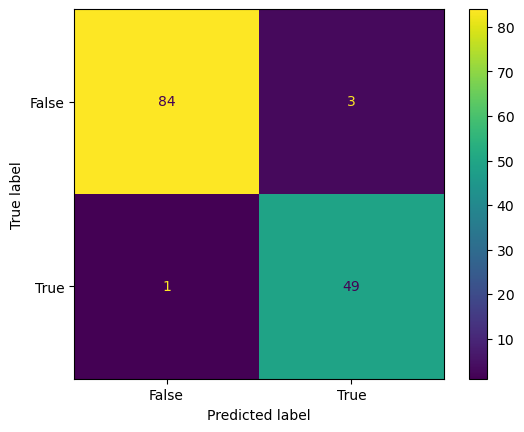

Accuracy: 0.9708029197080292


In [19]:
#confusion matrix
y_pred=cat_classifier.predict(XG_X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
confusion_matrix =confusion_matrix(XG_y_test, XG_y_pred)
cm_display =ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
#print(confusion_matrix)
cat_accuracy=accuracy_score(XG_y_test, XG_y_pred)
print("Accuracy:",cat_accuracy)

# graphs 

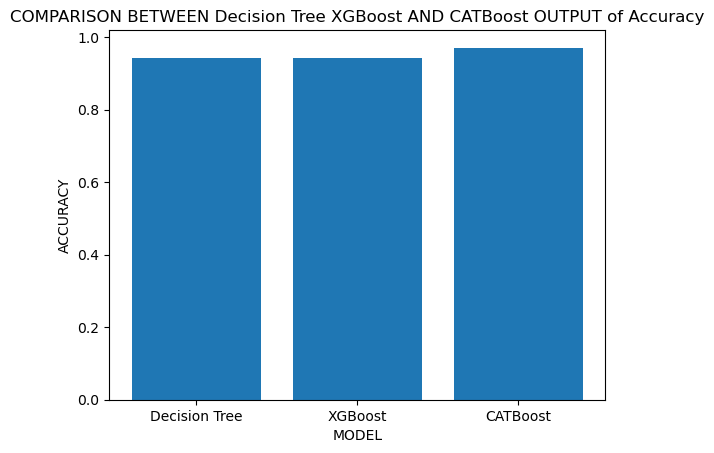

In [20]:
x = ['Decision Tree', 'XGBoost', 'CATBoost']
y = [decision_accuracy,XG_accuracy,cat_accuracy]
plt.bar(x, y)
plt.xlabel('MODEL')
plt.ylabel('ACCURACY')
plt.title('COMPARISON BETWEEN Decision Tree XGBoost AND CATBoost OUTPUT of Accuracy')

# display plot
plt.show()

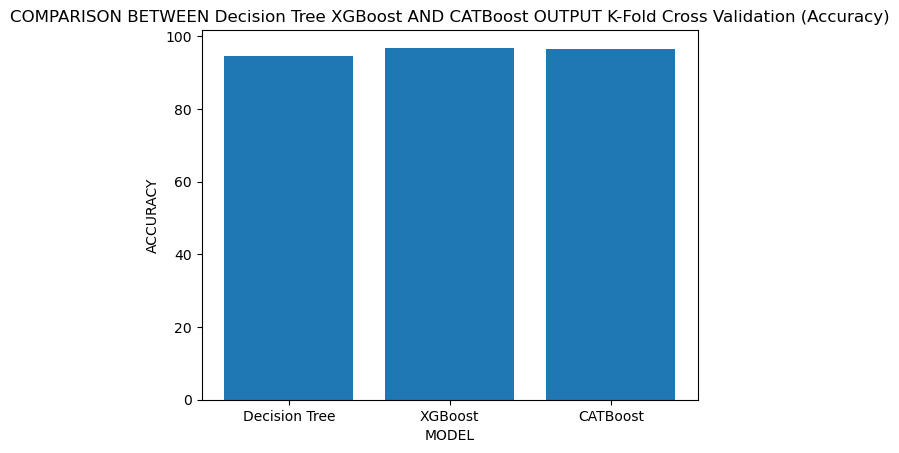

In [21]:
x = ['Decision Tree', 'XGBoost', 'CATBoost']
y = [cross_accuracy,XG__cross_accuracy,cat_cross_accuracy]
plt.bar(x, y)
plt.xlabel('MODEL')
plt.ylabel('ACCURACY')
plt.title('COMPARISON BETWEEN Decision Tree XGBoost AND CATBoost OUTPUT K-Fold Cross Validation (Accuracy)')

# display plot
plt.show()

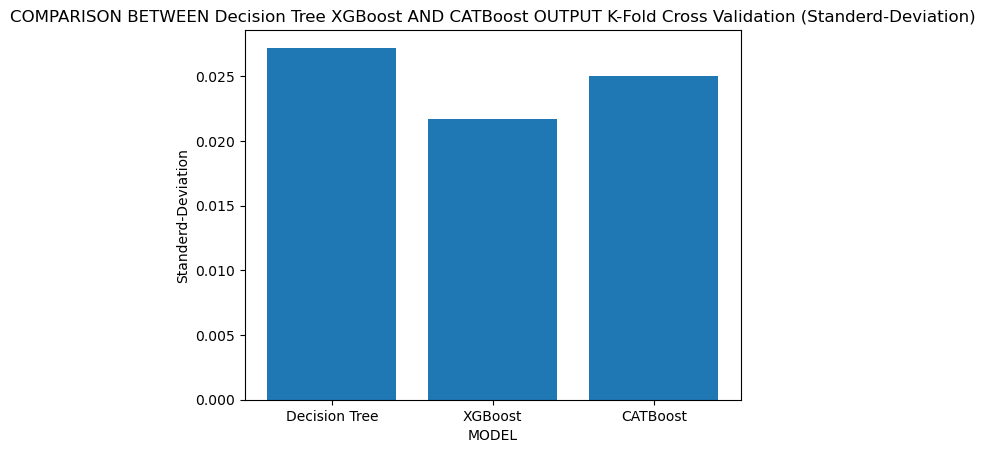

In [22]:
x = ['Decision Tree', 'XGBoost', 'CATBoost']
y = [cross_Standerd_Deviation,XG_cross_Standerd_Deviation,cat_cross_Standerd_Deviation]
plt.bar(x, y)
plt.xlabel('MODEL')
plt.ylabel('Standerd-Deviation')
plt.title('COMPARISON BETWEEN Decision Tree XGBoost AND CATBoost OUTPUT K-Fold Cross Validation (Standerd-Deviation)')

# display plot
plt.show()